In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/albrecht.arff.csv")
dataset.head()

,Input,Output,Inquiry,File,AdjFP,Effort
0,25,150,75,60,1750,102.4
1,193,98,70,36,1902,105.2
2,70,27,0,12,428,11.1
3,40,60,20,12,759,21.1
4,10,69,1,9,431,28.8


In [3]:

x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [4]:
y.shape

(24,)

Scaling the data

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(24,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [6]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =42)

In [7]:
x_train

array([[0.17741935, 0.34782609, 0.26666667, 0.21052632, 0.34938344],
       [0.19354839, 0.20289855, 0.26666667, 0.56140351, 0.28361715],
       [1.        , 0.62318841, 0.93333333, 0.57894737, 1.        ],
       [0.29032258, 0.4057971 , 0.        , 0.14035088, 0.29066353],
       [0.03225806, 0.05072464, 0.        , 0.35087719, 0.04932472],
       [0.33870968, 0.10869565, 0.        , 0.15789474, 0.13446858],
       [0.11290323, 0.21014493, 0.21333333, 0.14035088, 0.1280094 ],
       [0.11290323, 0.1884058 , 0.32      , 0.10526316, 0.18379331],
       [0.17741935, 0.34782609, 0.26666667, 0.15789474, 0.32883147],
       [0.01612903, 0.41304348, 0.01333333, 0.10526316, 0.13623018],
       [0.04301075, 0.02173913, 0.08      , 0.        , 0.        ],
       [0.10752688, 0.05797101, 0.32      , 0.05263158, 0.11802701],
       [0.09677419, 0.11594203, 0.05333333, 0.33333333, 0.17674692],
       [0.02688172, 0.02173913, 0.        , 0.21052632, 0.03581914],
       [0.05376344, 0.03623188, 0.

DecisionTree

In [8]:

import lightgbm as lgb

regr = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5)
regr.fit(x_train,y_train)



c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(learning_rate=0.09, max_depth=-5)

In [9]:
# Predicting the target values of the test set
y_pred = regr.predict(x_test)

In [10]:
y_pred=np.reshape(y_pred,(5,1))
y_test=np.reshape(y_test,(5,1))

Finding the RMSE and MAPE

Definition of Mean Absolute Percentage Error

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:

def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )


In [13]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.14062378782483903

RMSE:
 0.37499838376296907

MAPE:
 165.55090577916025

SMAPE:
 80.21

 Adj R2 score:
 -0.3846153846153848


In [14]:

y_pred=scaler.inverse_transform(y_pred)

In [15]:


y_test=scaler.inverse_transform(y_test)

In [16]:

y_test=np.reshape(y_test,(5,))
y_pred=np.reshape(y_pred,(5,))

In [17]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

   Actual Effort  Predicted Effort
0           12.9         18.442105
1           18.3         18.442105
2          102.4         18.442105
3           38.1         18.442105
4            2.9         18.442105


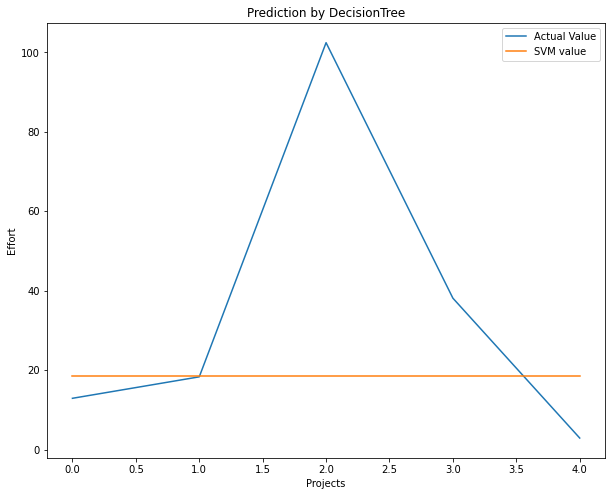

In [18]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="SVM value")
plt.title("Prediction by DecisionTree")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()